# Examen: Análisis de Datos Avanzado y Optimización en Decisiones Empresariales

## Empresa: AnalyticsPro Solutions

### Introducción

AnalyticsPro Solutions es una empresa que proporciona servicios de análisis avanzados y optimización de estrategias para empresas SaaS (Software como Servicio). Su enfoque principal es mejorar la eficiencia en los procesos de negocio mediante el uso de análisis predictivo, análisis inferencial, y optimización de decisiones empresariales.

### Contexto General

AnalyticsPro Solutions tiene cuatro áreas clave de enfoque:

1. **Pronóstico de Nuevos Usuarios**: Ayudar a las empresas a prever cuántos usuarios nuevos obtendrán cada mes.
2. **Optimización de Experiencia del Cliente**: Analizar las métricas que afectan la retención de clientes y proponer estrategias para mejorar la fidelidad.
3. **Definición de precios**: Hace soporte en la selección de precios que apoye el alcance de objetivos.
4. **Estrategias de Adquisición de Usuarios**: Determinar la asignación óptima de presupuesto en diferentes canales de marketing digital.

---

## Instrucciones Generales

- Este examen se centra en aplicar técnicas avanzadas de análisis de datos y optimización en un contexto práctico.
- Utiliza Python y, cuando sea necesario, herramientas como `auto-ts`, `scipy.optimize`, `semopy` y `statsmodels`.
- Proporciona tus razonamientos, interpretaciones y pasos detallados para cada pregunta.

---

## Parte 1: Pronóstico de Nuevos Usuarios con `auto-ts` (25 puntos)

**Contexto**  
AnalyticsPro Solutions desea prever cuántos usuarios nuevos obtendrá su cliente, Chaquetas Pal Frio, SA de CV, una marca de chaquetas para climas frios, en los próximos 12 meses, basándose en los datos de los últimos tres años. Este análisis es crucial para ajustar las estrategias de adquisición y recursos disponibles.

**Ejercicio**  
1. **Construcción del Modelo (15 puntos):**  
   - Utiliza `auto-ts` (o Prophet y ARIMA como alternativa) para construir un modelo de pronóstico que estime los nuevos usuarios mensuales para el próximo año.
   - Realiza una división del conjunto de datos en entrenamiento (70%) y prueba (30%).
   - Genera un gráfico que muestre los datos históricos, las predicciones del modelo en el conjunto de prueba, y las predicciones para los próximos 12 meses.
   - Calcula el RMSE en el conjunto de prueba y muestra un gráfico que visualice las predicciones futuras.

2. **Recomendación de Estrategias (10 puntos):**  
   - Basándote en los resultados del modelo, recomienda dos estrategias específicas para gestionar los recursos necesarios para captar nuevos usuarios en función de los picos y tendencias observadas.

---


In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import math

from auto_ts import auto_timeseries
from sklearn.metrics import mean_squared_error
import pmdarima as pm

from PIL import Image
from IPython.display import display

from semopy import Model, Optimizer, semplot
import matplotlib.pyplot as plt
%matplotlib inline

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



## Train y Test

In [2]:
users = pd.read_csv('new_users_forecast.csv', parse_dates=['month'])
users.set_index('month', inplace=True)
users.head()

,new_users
month,
2021-01-31,1225.0
2021-02-28,1235.0
2021-03-31,1110.0
2021-04-30,1178.0
2021-05-31,1100.0


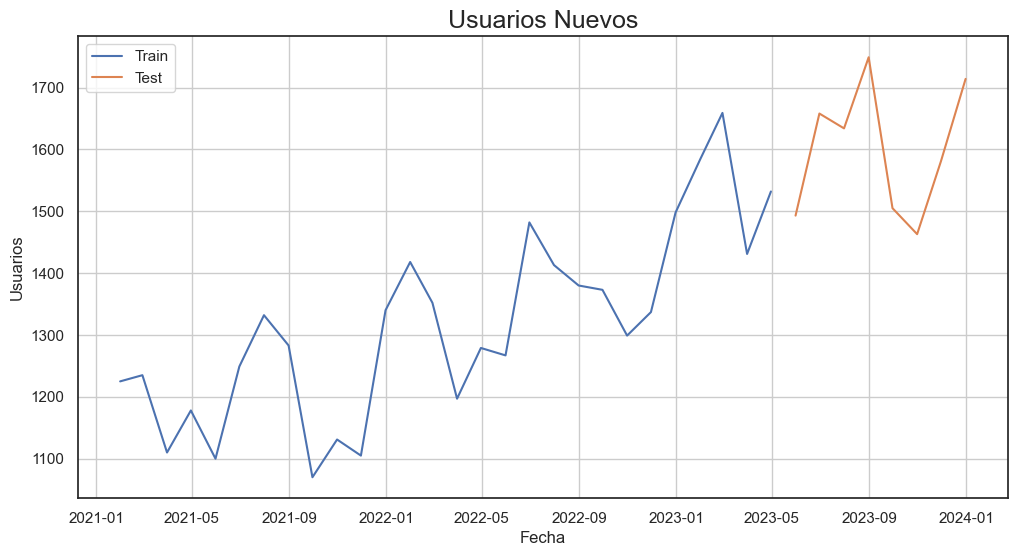

In [3]:
train_size_ats = int(0.8 * len(users))
train_size_arima = int(0.9 * len(users))

train_df = users[:train_size_ats]
test_df = users[train_size_ats:]

train_df_arima = users[:train_size_arima]
test_df_arima = users[train_size_arima:]


plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['new_users'], label='Train')
plt.plot(test_df.index, test_df['new_users'], label='Test')
plt.title('Usuarios Nuevos', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Usuarios')
plt.legend(loc='best')
plt.grid()
plt.show()

## Modelos de entrenamiento

### AutoTs 

Start of Fit.....
    Target variable given as = new_users
Start of loading of data.....
    Inputs: ts_column = month, sep = ,, target = ['new_users']
    Using given input: pandas dataframe...
    train time series month column is the index on test data...
    train data shape = (28, 1)
Alert: Could not detect strf_time_format of month. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


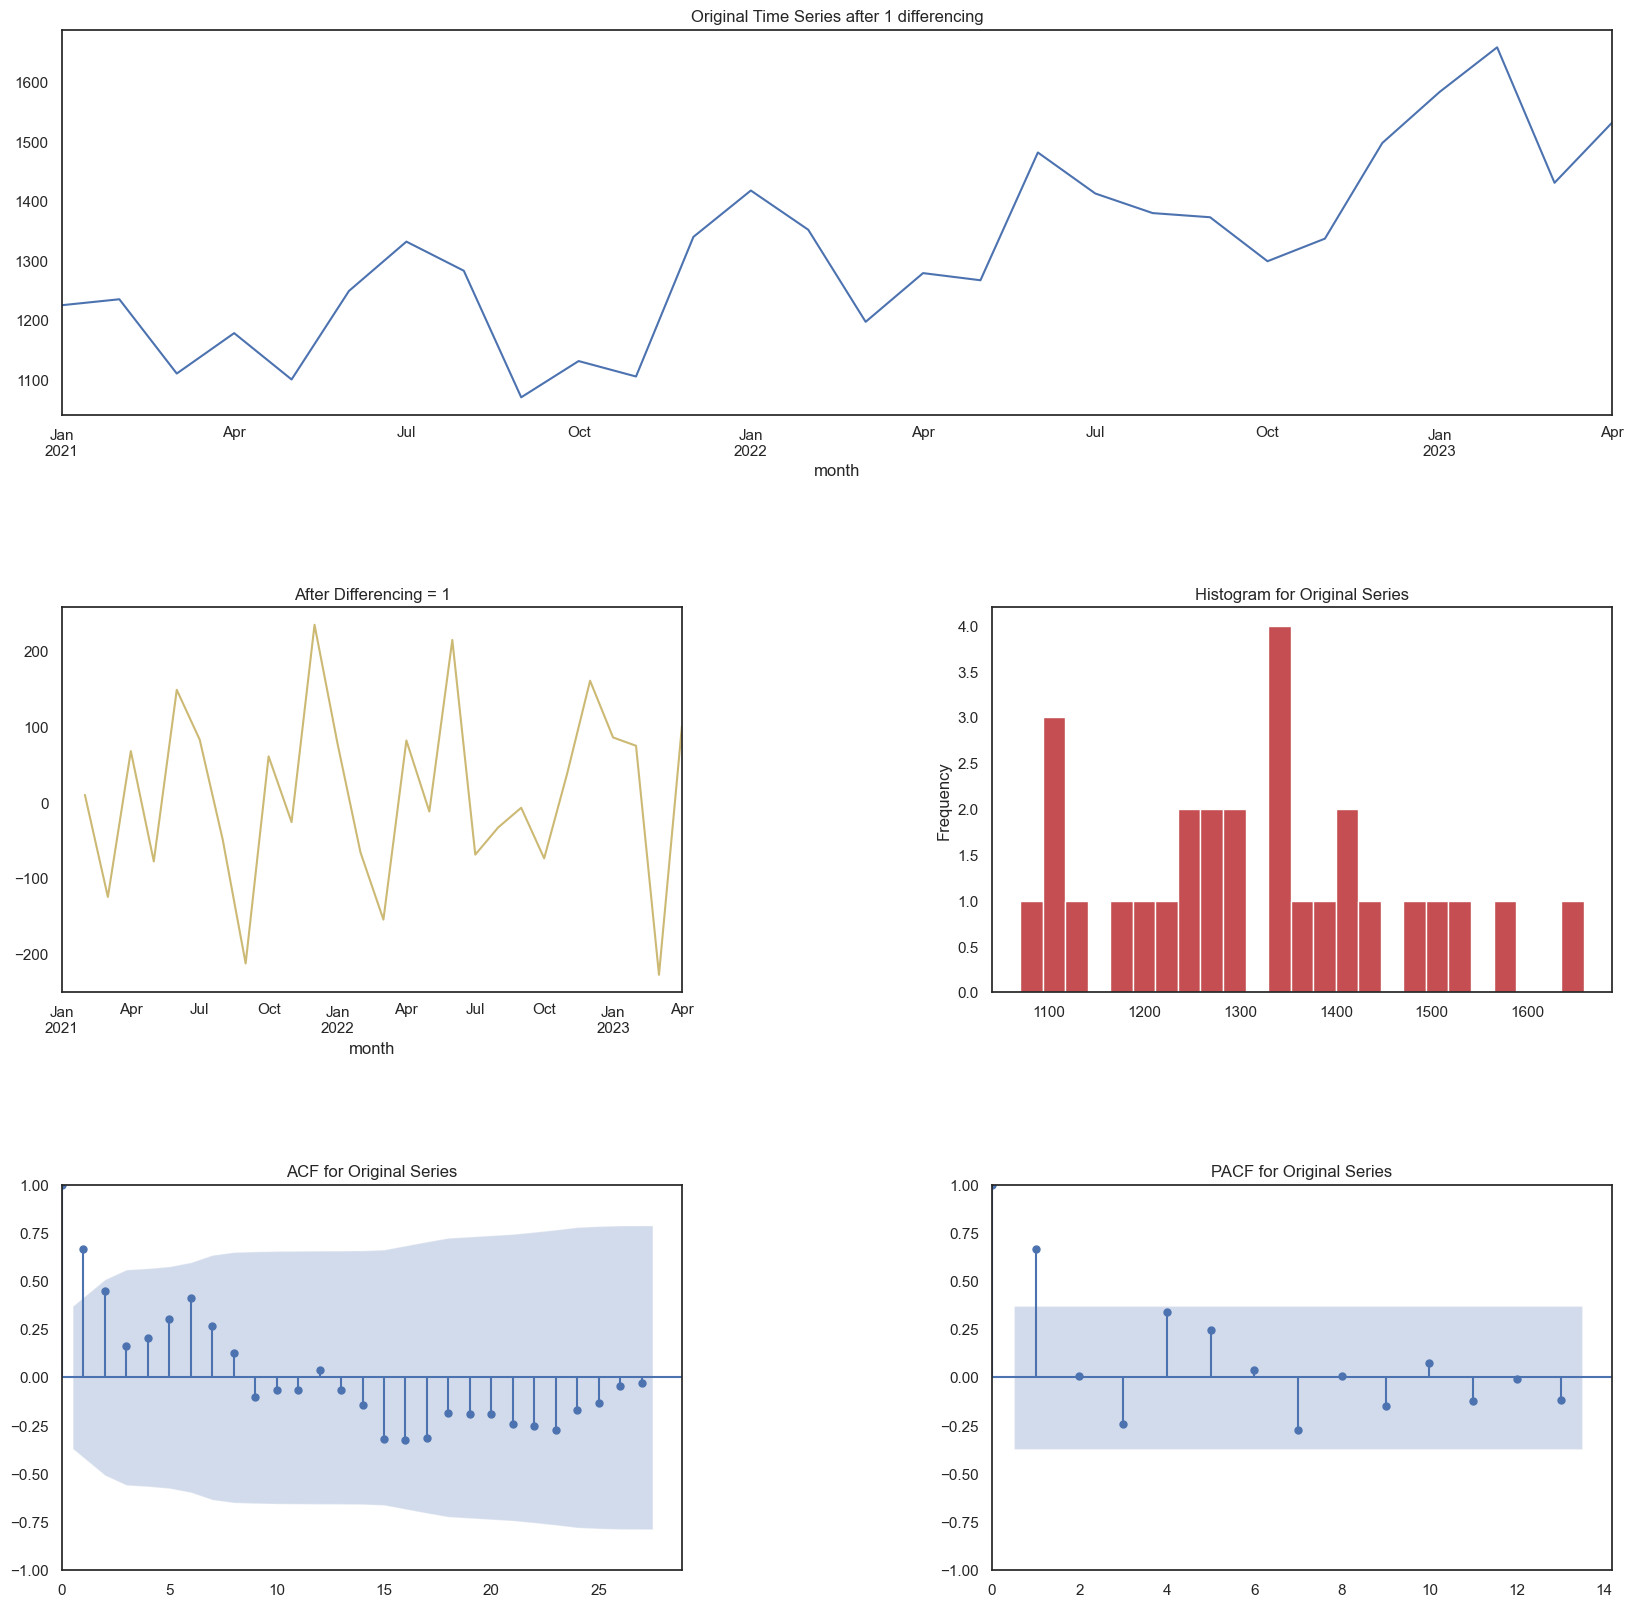

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


20:37:47 - cmdstanpy - INFO - Chain [1] start processing
20:37:47 - cmdstanpy - INFO - Chain [1] done processing


kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(28, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 3 Test Shape: 5
    RMSE = 319.53
    Std Deviation of actuals = 81.44
    Normalized RMSE (as pct of std dev) = 392%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 8 Test Shape: 5


20:37:48 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing
20:37:48 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 154.59
    Std Deviation of actuals = 139.28
    Normalized RMSE (as pct of std dev) = 111%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 13 Test Shape: 5
    RMSE = 95.86
    Std Deviation of actuals = 96.73
    Normalized RMSE (as pct of std dev) = 99%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 18 Test Shape: 5


20:37:48 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing
20:37:48 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 52.93
    Std Deviation of actuals = 39.06
    Normalized RMSE (as pct of std dev) = 136%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 23 Test Shape: 5
    RMSE = 154.32
    Std Deviation of actuals = 77.20
    Normalized RMSE (as pct of std dev) = 200%
Cross Validation window: 5 completed


20:37:49 - cmdstanpy - INFO - Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 133.17
    MSE (Mean Squared Error = 32359.96
    MAPE (Mean Absolute Percent Error) = 10%
    RMSE (Root Mean Squared Error) = 179.8887
    Normalized RMSE (MinMax) = 31%
    Normalized RMSE (as Std Dev of Actuals)= 118%
Time Taken = 1 seconds


20:37:49 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 3 Test Shape: 5

    Finding the best parameters using AutoArima:
Exception occurred while building Auto SARIMAX model...
There are no more samples after a first-order seasonal differencing. See http://alkaline-ml.com/pmdarima/seasonal-differencing-issues.html for a more in-depth explanation and potential work-arounds.
    Auto SARIMAX model error: predictions not available.


Building VAR Model - best suited for small datasets < 1000 rows and < 10 columns



No VAR model created since no explanatory variables given in data set


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since da

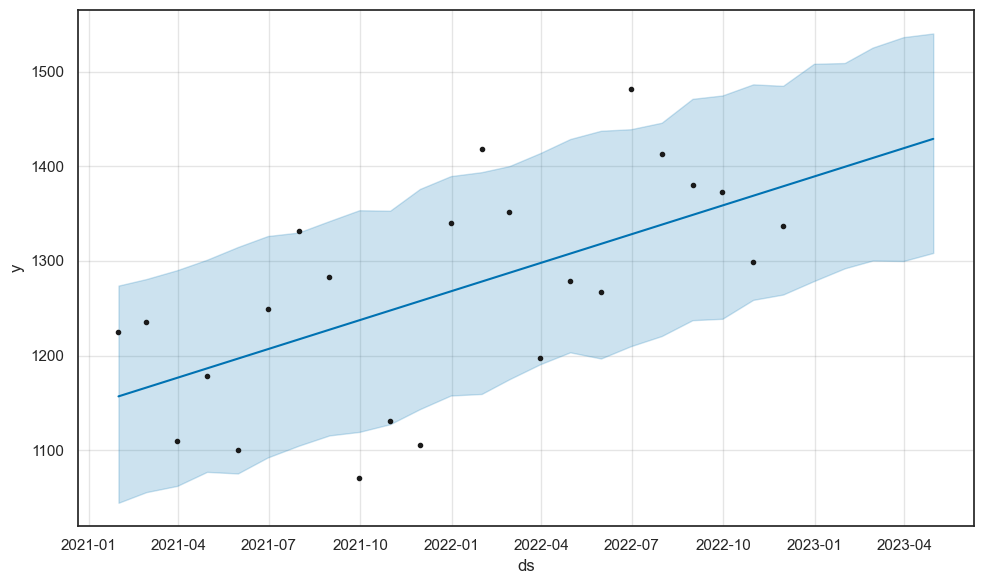

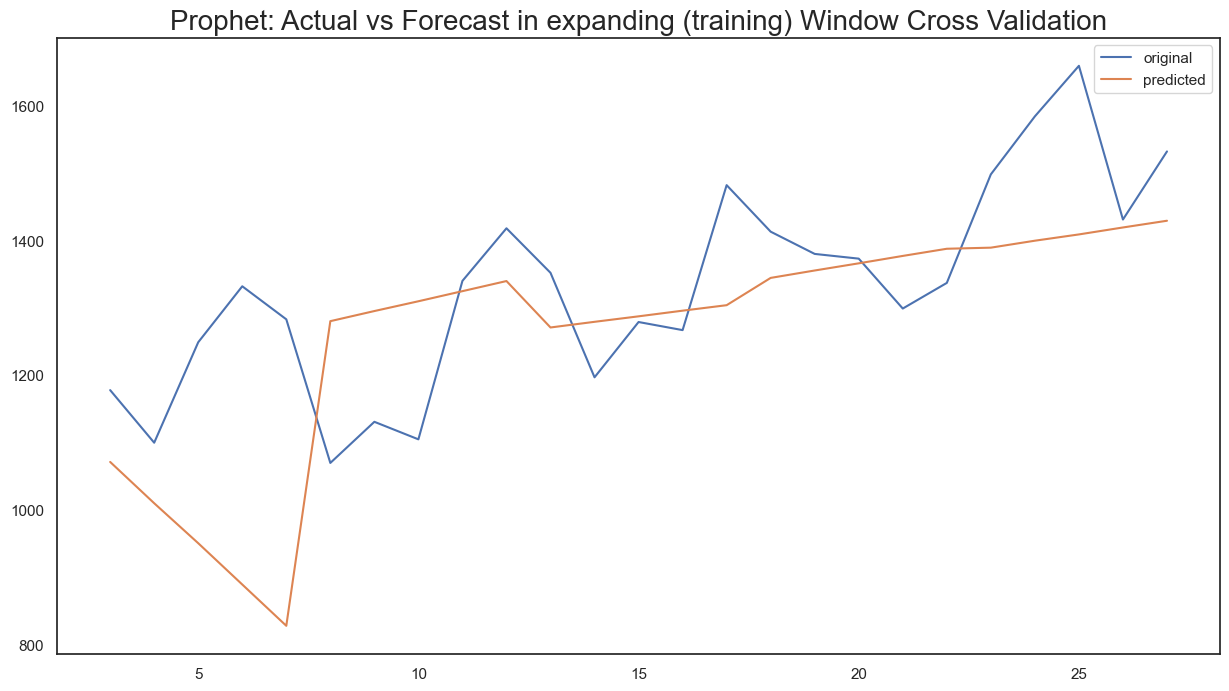

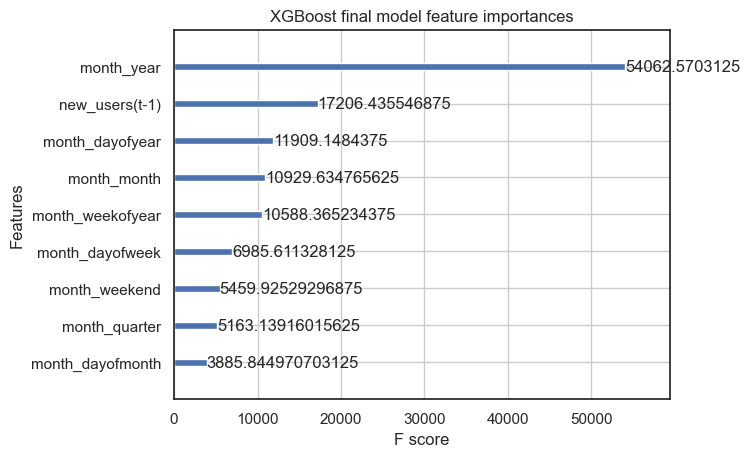

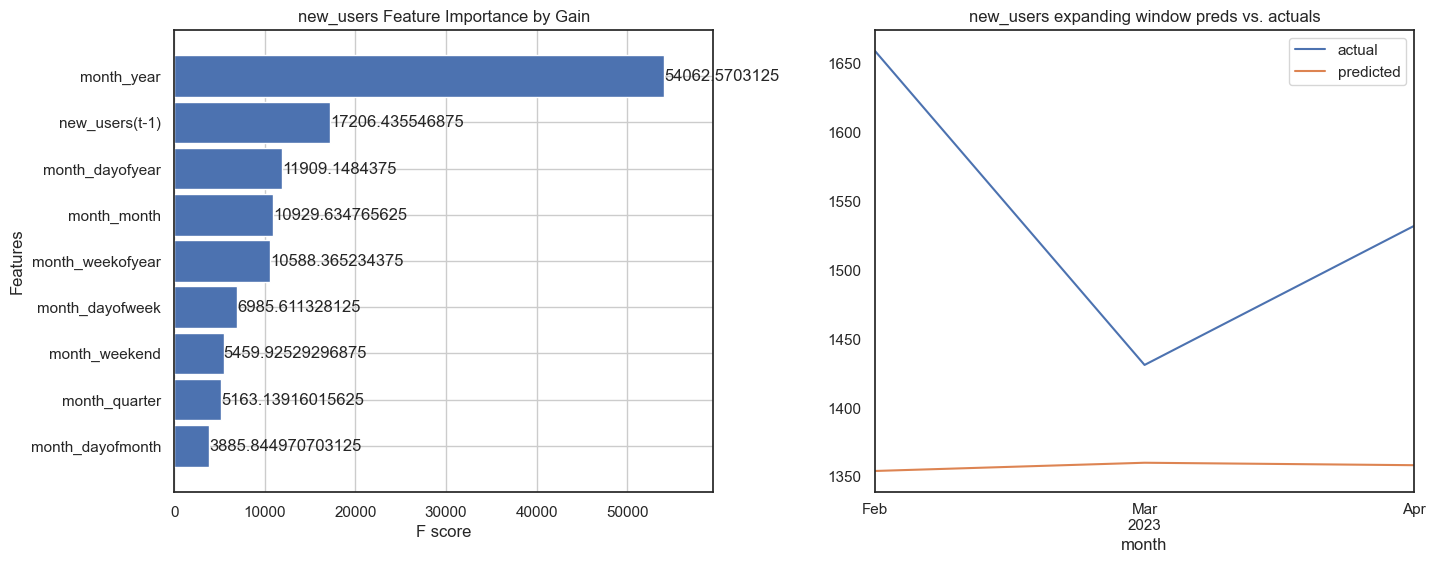

In [4]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=True,        # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2                # Nivel de verbosidad
)

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='new_users'
)

Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 8


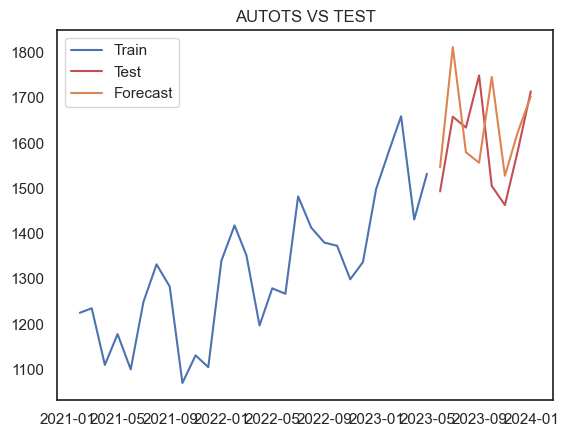

In [24]:
forecast_autots = model.predict(testdata=test_df)
plt.title('AUTOTS VS TEST')
plt.plot(train_df, label='Train')
plt.plot(test_df.index, test_df['new_users'], label='Test', color='r')
plt.plot(forecast_autots['ds'], forecast_autots['yhat'], label='Forecast')
plt.legend(loc='best')

In [25]:
rmse_autots = mean_squared_error(test_df['new_users'],  forecast_autots['yhat'], squared=False)
print(f'RMSE ML: {rmse_autots:.2f}')

RMSE ML: 127.80



## Parte 2: Optimización de Experiencia del Cliente con SEM (15 puntos)

**Contexto**  
AnalyticsPro Solutions busca analizar cómo las métricas de experiencia del cliente afectan la retención de uno de sus principales clientes. Se han identificado las siguientes variables clave:
- **Engagement en la Plataforma**: Un índice calculado con base en el tiempo promedio de uso semanal, el número de interacciones, y las sesiones activas por usuario.
- **Soporte al Cliente**: Medido por los tiempos de respuesta y el índice de resolución de problemas.
- **Retención del Cliente**: Una variable clave para determinar el éxito de las estrategias de fidelización.

**Ejercicio**  
1. **Construcción del Modelo SEM (10 puntos):**  
   - Crea un modelo SEM que incluya las variables latentes **Engagement en la Plataforma** (medido por `Tiempo Promedio`, `Interacciones`, y `Sesiones Activas`) y **Soporte al Cliente** (medido por `Tiempo de Respuesta` y `Resolución de Problemas`).
   - Genera un gráfico de las trayectorias y muestra las cargas factoriales y coeficientes.

2. **Interpretación y Recomendaciones (5 puntos):**  
   - Propón dos acciones específicas para mejorar las métricas de engagement y soporte.


In [26]:
retention = pd.read_csv('retention_data.csv')
retention.head()

,tiempo_promedio,interacciones,sesiones_activas,tiempo_respuesta,resolucion_problemas,retencion
0,21.044318,8,16.715266,1.724732,0.333628,9.587410
1,10.201649,8,17.772422,1.389644,0.791558,7.112177
2,13.359070,7,15.705766,1.745930,0.451294,6.206844
3,20.984306,13,13.531889,1.926110,0.183442,8.983417
4,23.692333,10,11.689639,1.773376,0.854974,9.345260


In [31]:
df_for_scaler = retention[['tiempo_promedio', 'interacciones', 'sesiones_activas', 'tiempo_respuesta', 'resolucion_problemas']] 

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_scaler[['tiempo_promedio', 'interacciones', 'sesiones_activas', 'tiempo_respuesta', 'resolucion_problemas']] )

df_scaled = pd.DataFrame(df_scaled, columns = ['tiempo_promedio', 'interacciones', 'sesiones_activas', 'tiempo_respuesta', 'resolucion_problemas'])
df_scaled.head()

,tiempo_promedio,interacciones,sesiones_activas,tiempo_respuesta,resolucion_problemas
0,0.216441,-0.612395,0.410509,-0.581893,-0.581090
1,-2.001406,-0.612395,0.679809,-1.264582,1.009568
2,-1.355561,-0.917677,0.153349,-0.538705,-0.172368
3,0.204166,0.914014,-0.400425,-0.171617,-1.102774
4,0.758088,-0.001832,-0.869720,-0.482789,1.229848


In [32]:
model_desc = """
# Latent Variables
Engagement =~ tiempo_promedio + interacciones + sesiones_activas
Soporte =~ tiempo_respuesta + resolucion_problemas
"""

mod = Model(model_desc)
res_opt = mod.fit(df_scaled)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,tiempo_promedio,~,Engagement,1.000000,-,-,-
1,interacciones,~,Engagement,0.134879,2.584663,0.052184,0.958382
2,sesiones_activas,~,Engagement,-0.029388,0.576461,-0.05098,0.959341
3,tiempo_respuesta,~,Soporte,1.000000,-,-,-
4,resolucion_problemas,~,Soporte,-0.068301,3.003478,-0.022741,0.981857
5,Engagement,~~,Engagement,0.287295,5.509273,0.052148,0.958411
6,Soporte,~~,Soporte,0.277354,12.204338,0.022726,0.981869
7,Soporte,~~,Engagement,0.014833,0.044675,0.332024,0.739871
8,interacciones,~~,interacciones,0.994786,0.11835,8.405481,0.0
9,resolucion_problemas,~~,resolucion_problemas,0.998725,0.085036,11.744705,0.0


In [33]:
g = semplot(mod, 'pd.png')

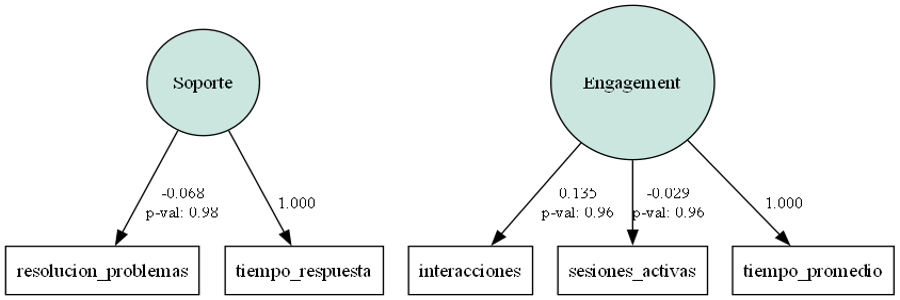

In [34]:
img = Image.open("pd.png")
img_resized = img.resize((900, 300))
display(img_resized)

## Conclusiones

- Los p-values de resolución de problemas, interacciones y sesiones_activas dirían que ninguna de esas variables es significante ni para el soporte ni para el engagement. Además de sus p-values, los pesos que tienen estos factores son muy pequeños, todos se encuentran por debajo de 0.15.
- Si quieren mejorar el soporte al cliente, deben de enfocarse totalmente en resolver los tiempos de respuesta, dado que lo demás no impacta significativamente al soporte.
- Si quieren mejorar el engagement en la plataforma, lo primero que deben enfocarse en resolver es el tiempo promedio de respuesta. Luego pueden pensar en resolver las interacciones que tiene un 0.13 de peso, y las sesiones activas son prácticamente irrelevantes.


## Parte 3: Evaluación de Precios con Pruebas A/B (30 puntos)

### Contexto

Correcaminos, SA de CV, una empresa de entrega a domicilio, contrató a AnalyticsPro Solutions para ajustar su esquema de precios. El principal objetivo de Correcaminos es aumentar el **Ingreso Promedio por Usuario (ARPU)** en al menos **300 MXN**. Actualmente, el modelo de precios cobra **60 MXN** por cada kilómetro de trayecto. Sin embargo, un análisis previo sugiere que el precio debería incrementarse a **78 MXN** por kilómetro. Adicionalmente, el dueño teme que este aumento pueda provocar una disminución significativa en la tasa de conversión.

---

### Ejercicio

#### Parte 1: Diseño de la Prueba A/B (10 puntos)

1. Define dos pruebas A/B para evaluar los objetivos de Correcaminos:
   - **Prueba 1 (ARPU):** El **Grupo A** utiliza el precio actual (**60 MXN**), mientras que el **Grupo B** utiliza el precio actualizado (**78 MXN**). Esta prueba busca determinar si el ARPU aumenta en al menos **300 MXN**.
   - **Prueba 2 (Tasa de Conversión):** El **Grupo A** utiliza el precio actual (**60 MXN**), mientras que el **Grupo B** utiliza el precio actualizado (**78 MXN**). Esta prueba busca determinar si la tasa de conversión no disminuye significativamente.

2. Usando los datos de `correcaminos_historical_arpu.csv`, calcula el tamaño mínimo de muestra necesario para detectar un aumento de **300 MXN** en el ARPU con un nivel de confianza del **95%** y un poder estadístico del **80%**.

3. Usando los datos de `correcaminos_historical_conversion.csv`, calcula el tamaño mínimo de muestra necesario para detectar una disminución significativa en la tasa de conversión con el mismo nivel de confianza y poder estadístico.




In [35]:
arpu = pd.read_csv('correcaminos_historical_arpu.csv')
conversion = pd.read_csv('correcaminos_historical_conversion.csv')
arpu.head()

,customer_id,arpu
0,0,1891.606831
1,1,1980.744752
2,2,1696.820534
3,3,1845.434482
4,4,2459.058560


In [36]:
conversion.head()

,lead_id,converted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## Tamaño de muestra para ARPU 

In [47]:
var_arpu = arpu['arpu'].var()
n_arpu = (2*((1.96+0.84)**2)*var_arpu)/(300)**2
print('El tamaño de muestra para la prueba de ARPU es de: ', n_arpu)

El tamaño de muestra para la prueba de ARPU es de:  15.63287774002043


## Tamaño de muestra para Tasa de conversión

In [48]:
tasa_conversion = conversion['converted'].mean()
tamaño_conversion = ((2*((1.96+0.84)**2)*tasa_conversion*(1-tasa_conversion))/(0.01)**2)
print('El tamaño de muestra para la prueba de la tasa de conversion es de: ', tamaño_conversion)

El tamaño de muestra para la prueba de la tasa de conversion es de:  13924.857340423992


---

#### Parte 2: Análisis de Resultados de la Prueba (20 puntos)

Después de dos semanas, la empresa comparte los resultados en los archivos `correcaminos_resultado_arpu_ab_test.csv` y `correcaminos_resultado_conversion_ab_test.csv`. Realiza lo siguiente:

1. Evalúa si se cumplieron los objetivos de la empresa mediante pruebas de hipótesis:
   - **Para el ARPU:** Realiza una prueba t de dos muestras para comparar si el ARPU del **Grupo B** es significativamente mayor que el del **Grupo A** y cumple con el incremento de **300 MXN**.
   - **Para la Tasa de Conversión:** Realiza una prueba z de dos proporciones para determinar si la tasa de conversión del **Grupo B** es significativamente menor que la del **Grupo A**.

2. Si el objetivo de incrementar el ARPU no se cumple, calcula cuál es el incremento mínimo en el ARPU que es estadísticamente significativo, basándote en los datos proporcionados.

3. Basándote en los resultados de ambas pruebas, así como en el tamaño de muestra, proporciona una recomendación clara y respaldada por los datos al dueño de Correcaminos, SA de CV. Considera tanto el impacto en el ARPU como en la tasa de conversión.

## Prueba estadística para ARPU 

In [57]:
arpu_new = pd.read_csv('correcaminos_resultado_arpu_ab_test.csv')
arpu_new.head()

,group,arpu
0,A,2000.141610
1,A,1943.076949
2,A,1757.569506
3,A,2144.105349
4,A,1801.859144


In [55]:
# Experimento controlado, distinto número de observaciones
arpu_A = arpu_new[arpu_new['group'] == 'A']['arpu']
arpu_B = arpu_new[arpu_new['group'] == 'B']['arpu']

# Objectivo: tener diferencia de 20 dolares en el ARPU
objective_difference = 300

# Promedio y desviación estandar por grupo
mean_a = np.mean(arpu_A)
mean_b = np.mean(arpu_B)

std_a = np.std(arpu_A, ddof=1)
std_b = np.std(arpu_B, ddof=1)

n_a = len(arpu_A)
n_b = len(arpu_B)

pooled_std = np.sqrt(((std_a**2 / n_a) + (std_b**2 / n_b)))
t_stat = (mean_b - mean_a - objective_difference) / pooled_std
p_value = 1 - stats.t.cdf(t_stat, df=min(n_a, n_b) - 1)

# Output the results
print(f"Mean LTV of Group A: {mean_a:.2f}")
print(f"Mean LTV of Group B: {mean_b:.2f}")
print(f"Objective Difference: {objective_difference}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mean LTV of Group A: 1998.87
Mean LTV of Group B: 2244.67
Objective Difference: 300
T-statistic: -5.1032
P-value: 1.0000


### No se cumple, por lo tanto, buscar una diferencia estadísticamente aceptable 

In [105]:
# Experimento controlado, distinto número de observaciones
arpu_A = arpu_new[arpu_new['group'] == 'A']['arpu']
arpu_B = arpu_new[arpu_new['group'] == 'B']['arpu']

# Objectivo: tener diferencia de 20 dolares en el ARPU
objective_difference = 228

# Promedio y desviación estandar por grupo
mean_a = np.mean(arpu_A)
mean_b = np.mean(arpu_B)

std_a = np.std(arpu_A, ddof=1)
std_b = np.std(arpu_B, ddof=1)

n_a = len(arpu_A)
n_b = len(arpu_B)

pooled_std = np.sqrt(((std_a**2 / n_a) + (std_b**2 / n_b)))
t_stat = (mean_b - mean_a - objective_difference) / pooled_std
p_value = 1 - stats.t.cdf(t_stat, df=min(n_a, n_b) - 1)

# Output the results
print(f"Mean LTV of Group A: {mean_a:.2f}")
print(f"Mean LTV of Group B: {mean_b:.2f}")
print(f"Objective Difference: {objective_difference}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mean LTV of Group A: 1998.87
Mean LTV of Group B: 2244.67
Objective Difference: 228
T-statistic: 1.6755
P-value: 0.0472


Una diferencia de 228 dólares es estadísticamente aceptable por el p-value menor a 0.05 

## Prueba estadística para ARPU 

In [58]:
conversion_new = pd.read_csv('correcaminos_resultado_conversion_ab_test.csv')
conversion_new.head()

,group,converted
0,A,0
1,A,0
2,A,0
3,A,1
4,A,0


In [69]:
conversions_a = conversion_new[conversion_new['group'] == 'A']['converted'].sum()
total_a = len(conversion_new[conversion_new['group'] == 'A']['converted'])
conversions_b = conversion_new[conversion_new['group'] == 'B']['converted'].sum()
total_b = len(conversion_new[conversion_new['group'] == 'B']['converted'])

# Calcular conversion rate
rate_a = conversions_a / total_a
rate_b = conversions_b / total_b

In [70]:
# Hacer un z-test de proporciones
count = np.array([conversions_a, conversions_b])
nobs = np.array([total_a, total_b])
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: 0.9803248291159256, P-value: 0.3269258023592585


### Conclusiones

- La prueba realizada no muestra resultados estadísticamente aceptables para que se cumpla el aumento de 300 en el ARPU.
- Sin embargo, si pueden respaldar que el ARPU crezca 228 dólares.
- Por último, aunque se puede probar que el ARPU sube 228, la prueba no puede aceptar la prueba de tasa de conversión dado que tiene un p-value de 0.32.
- La empresa, debería de plantear bajar su objetivo de cambio en ARPU.


## Parte 4: Estrategia de Adquisición con Regresión y Optimización (30 puntos)

**Contexto**  
Correcaminos, SA de CV quiere maximizar la adquisición de usuarios con un presupuesto de **15,000 USD** utilizando los siguientes canales:
1. **Anuncios en TikTok**
2. **Publicidad en Meta**

Se proporcionan datos históricos de costos y usuarios adquiridos para cada canal. Deberás generar las funciones de Costo de Adquisición de Cliente (CAC) mediante regresión lineal.

**Ejercicio**  
1. **Generación de Funciones de CAC (15 puntos):**  
   - Utiliza regresión lineal para estimar el CAC en función del número de usuarios adquiridos para cada canal.
   - Presenta las funciones de CAC y gráficos con las líneas de regresión ajustadas.

2. **Optimización del Presupuesto (15 puntos):**  
   - Define un modelo de optimización que utilice `scipy.optimize.minimize` para determinar cuántos usuarios adquirir en cada canal, sujeto a la restricción de presupuesto.
   - Muestra los resultados, indicando cuántos usuarios deben adquirirse en cada canal y el costo total estimado.



In [77]:
marketing = pd.read_csv('marketing_data.csv')
tiktok = marketing[marketing['channel'] == 'TikTok']
meta = marketing[marketing['channel'] == 'Meta']

In [79]:
tiktok.head()

,channel,users,cost
0,TikTok,454.0,17.924870
1,TikTok,229.0,34.989721
2,TikTok,370.0,26.888859
3,TikTok,403.0,31.542227
4,TikTok,232.0,19.931806


In [82]:
meta.head()

,channel,users,cost
350,Meta,318.0,37.925929
351,Meta,273.0,32.217992
352,Meta,323.0,46.369604
353,Meta,154.0,30.531578
354,Meta,244.0,38.816485


## Regresión Tiktok

In [81]:
x = ['users']

y = ['cost']

X=sm.add_constant(tiktok[x])

model=sm.OLS(tiktok[y], X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     434.1
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           3.63e-63
Time:                        21:26:07   Log-Likelihood:                -1045.7
No. Observations:                 350   AIC:                             2095.
Df Residuals:                     348   BIC:                             2103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7754      0.712     15.131      0.0

## Regresión Meta

In [83]:
x = ['users']

y = ['cost']

X=sm.add_constant(meta[x])

model=sm.OLS(meta[y], X)
results= model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1688.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):          3.21e-183
Time:                        21:27:26   Log-Likelihood:                -1981.8
No. Observations:                 655   AIC:                             3968.
Df Residuals:                     653   BIC:                             3977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7569      0.549     26.896      0.0

## Funciones de CAC 

In [84]:
def cac_tiktok(users):
    return 10.7754 + 0.0480 * users

def cac_meta(users):
    return 14.7569 + 0.0698 * users

### Problema de Optimización

In [86]:
budget = 15000

# Función de usuarios totales a maximizar
def total_users(x):
    tiktok_users, meta_users = x
    return -1 * (tiktok_users + meta_users)

# Función de costo total, sujeto a la restricción del presupuesto
def total_cost(x):
    tiktok_users, meta_users = x
    return (tiktok_users * cac_tiktok(tiktok_users) +
            meta_users * cac_meta(meta_users))

# Restricción de Presupuesto
constraints = [
    {'type': 'ineq', 'fun': lambda x: budget - total_cost(x)}
]

# No negatividad
bounds = [(0, None), (0, None)]

# Xo
initial_guess = [100, 100]

# Resolver el problema de optimización
result = minimize(total_users, initial_guess, constraints=constraints, bounds=bounds)

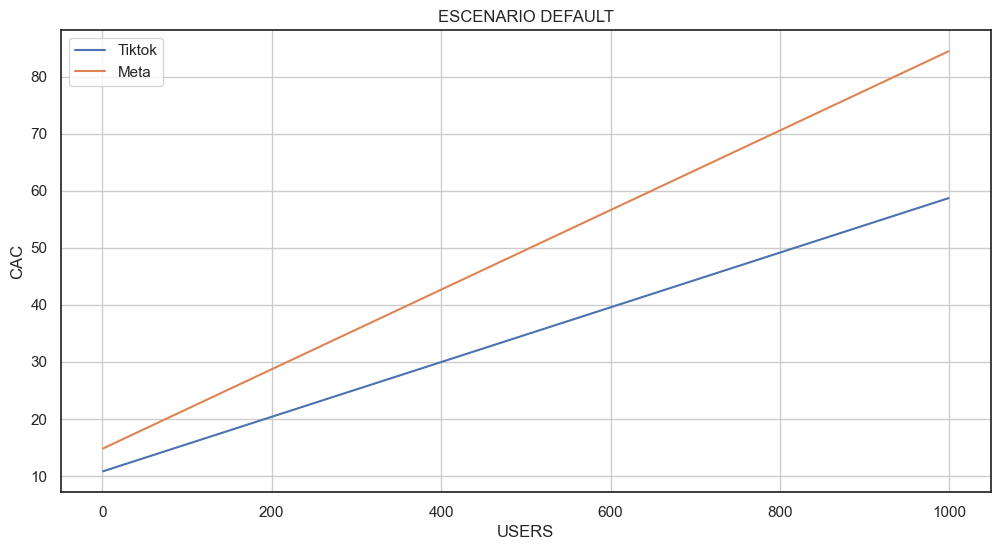

In [87]:
df = pd.DataFrame(list(range(1,1000,1)))

df['cac_tiktok'] = df[0].apply(lambda x: cac_tiktok(x))
df['cac_meta'] = df[0].apply(lambda x: cac_meta(x))
plt.figure(figsize=(12,6))
plt.plot(df[0], df['cac_tiktok'], label='Tiktok')
plt.plot(df[0], df['cac_meta'],  label='Meta')
plt.title('ESCENARIO DEFAULT')
plt.legend(loc='best')
plt.xlabel('USERS')
plt.ylabel('CAC')
plt.grid()

## Usuarios Adquiridos y costo por canal 

In [89]:
optimal_users = result.x
tiktok_users, meta_users = optimal_users

costo_tiktok = tiktok_users * cac_tiktok(tiktok_users)
costo_meta = meta_users * cac_meta(meta_users)

print('---Usuarios obtenidos por canal:---')
print(f'TikTok:                    {int(optimal_users[0])}')
print(f'Meta:                      {int(optimal_users[1])}')

print('\n---Asignación de Capital por canal:---')
print(f'TikTok:                   ${costo_tiktok:.2f}')
print(f'Meta:                     ${costo_meta:.2f}')

print('\n---Costo promedio por usuario en cada canal:---')
print(f'TikTok:                   ${costo_tiktok/int(optimal_users[0]):.4f}')
print(f'Meta:                     ${costo_meta/int(optimal_users[1]):.4f}')

print('\n---Total:---')
print(f'Costo total estimado: ${total_cost(result.x):,.4f}')
print(f'Usuarios totales adquiridos: {int(-result.fun)}')

---Usuarios obtenidos por canal:---
TikTok:                    337
Meta:                      203

---Asignación de Capital por canal:---
TikTok:                   $9103.70
Meta:                     $5896.30

---Costo promedio por usuario en cada canal:---
TikTok:                   $27.0139
Meta:                     $29.0458

---Total:---
Costo total estimado: $15,000.0000
Usuarios totales adquiridos: 541


---

## Parte Extra (Opcional, 5 puntos): Integración de AI para mejorar la atención a clientes.

**Contexto**  
Correcaminos, SA de CV le solicito a AnalyticsPro Solutions que explore soluciones basadas en Inteligencia Artificial para dar un mejor servicio a clientes usando IA para mejorar su Churn y NPS. Esto dado que quieren escalar su operación sin embargo solo quieren hacerlo si mejora sus métricas.

**Ejercicio Opcional**
1. **Beneficios del Uso de AI e integración (5 puntos):** 
    - Que beneficios tendría usar la IA.
    - Haz una estrategia de como podrías implementar IA para mejorar la atención a clientes. ¿Cómo harías esta integración?, ¿usarías algún tipo de prueba?